In [1]:
import pandas as pd
import json

# Load Data

Source: <https://www.kaggle.com/datasets/jannalipenkova/cleantech-media-dataset>

In [2]:
# load raw data
df_cleantech_media = pd.read_csv('../data/cleantech_media_dataset_v2_2024-02-23.csv', index_col=0, parse_dates=['date'])
df_cleantech_media

,title,date,author,content,domain,url
1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
...,...,...,...,...,...,...
81812,Strata Clean Energy Nets $ 300 Million in Fund...,2023-11-06,NaN,['Strata Clean Energy has closed a $ 300 milli...,solarindustrymag,https://solarindustrymag.com/strata-clean-ener...
81813,Orsted Deploying SparkCognition Renewable Suit...,2023-11-07,NaN,['Global renewable energy developer Ørsted is ...,solarindustrymag,https://solarindustrymag.com/orsted-deploying-...
81814,Veolia Has Plans for 5 MW of Solar in Arkansas,2023-11-07,NaN,"['Veolia North America, a provider of environm...",solarindustrymag,https://solarindustrymag.com/veolia-has-plans-...
81815,"SunEdison: Too Big, Too Fast?",2023-11-08,NaN,['Once the self-proclaimed “ leading renewable...,solarindustrymag,http://www.solarindustrymag.com/online/issues/...


In [3]:
df_cleantech_media.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9593 entries, 1280 to 81816
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    9593 non-null   object        
 1   date     9593 non-null   datetime64[ns]
 2   author   31 non-null     object        
 3   content  9593 non-null   object        
 4   domain   9593 non-null   object        
 5   url      9593 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 524.6+ KB


In [4]:
(df_cleantech_media.date.max(), df_cleantech_media.date.min())

(Timestamp('2023-12-05 00:00:00'), Timestamp('2021-01-01 00:00:00'))

We have 9593 articels in the dataset, but only 31 have an author. The rest of the columns seems to be complete. The articles seem to be published in the timespan from 2021-01-01 to 2023-12-05.

## Cleaning the content-column

In [5]:
# content seems to be have some strange leading/trailing characters
df_cleantech_media.content.str[-30:]

1280     .9'20). Rafiq Latta, Nicosia"]
1281     consortium first ( related)."]
1283     ntensifies ( PIW Jan.15'21)."]
1284     te completion until October."]
1285     ). Kathrine Schmidt, Houston"]
                      ...              
81812    ns Inc. All Rights Reserved.']
81813    ns Inc. All Rights Reserved.']
81814    ns Inc. All Rights Reserved.']
81815    onary tale for the industry.']
81816    ns Inc. All Rights Reserved.']
Name: content, Length: 9593, dtype: object

In [6]:
df_cleantech_media.content.str[:30]

1280     ["Qatar Petroleum ( QP) is tar
1281     ["• Nuclear Power Corp. of Ind
1283     ["New US President Joe Biden t
1284     ["The slow pace of Japanese re
1285     ["Two of New York City's large
                      ...              
81812    ['Strata Clean Energy has clos
81813    ['Global renewable energy deve
81814    ['Veolia North America, a prov
81815    ['Once the self-proclaimed “ l
81816    ['Arevon Energy Inc. has close
Name: content, Length: 9593, dtype: object

In [7]:
# get rid of all trailing/leading character which are no alpha-numeric - the ugly but working way (regex did not)
df_cleantech_media.content = df_cleantech_media['content'].str.strip('[]"\'• ')
df_cleantech_media

,title,date,author,content,domain,url
1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,Qatar Petroleum ( QP) is targeting aggressive ...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,Nuclear Power Corp. of India Ltd. ( NPCIL) syn...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,New US President Joe Biden took office this we...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,The slow pace of Japanese reactor restarts con...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,Two of New York City's largest pension funds s...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
...,...,...,...,...,...,...
81812,Strata Clean Energy Nets $ 300 Million in Fund...,2023-11-06,NaN,Strata Clean Energy has closed a $ 300 million...,solarindustrymag,https://solarindustrymag.com/strata-clean-ener...
81813,Orsted Deploying SparkCognition Renewable Suit...,2023-11-07,NaN,Global renewable energy developer Ørsted is de...,solarindustrymag,https://solarindustrymag.com/orsted-deploying-...
81814,Veolia Has Plans for 5 MW of Solar in Arkansas,2023-11-07,NaN,"Veolia North America, a provider of environmen...",solarindustrymag,https://solarindustrymag.com/veolia-has-plans-...
81815,"SunEdison: Too Big, Too Fast?",2023-11-08,NaN,Once the self-proclaimed “ leading renewable p...,solarindustrymag,http://www.solarindustrymag.com/online/issues/...


## Check for duplicates

In [8]:
# content is propably the most important column, we check its contents
df_cleantech_media[df_cleantech_media.duplicated(subset=['content'], keep=False)]

,title,date,author,content,domain,url
6685,Indonesia seeks investors for giant geothermal...,2022-12-09,NaN,"Indonesia, home to the world’ s largest geothe...",energyvoice,https://www.energyvoice.com/oilandgas/467719/i...
6689,Indonesia seeks investors for giant geothermal...,2022-12-09,NaN,"Indonesia, home to the world’ s largest geothe...",energyvoice,https://sgvoice.energyvoice.com/investing/2002...
78210,Portugal energy transition plan targets massiv...,2023-07-03,NaN,Portugal has more than doubled its 2030 goals ...,rechargenews,https://www.rechargenews.com/energy-transition...
78212,"Wind, hydrogen and solar fused in Portugal's p...",2023-07-03,NaN,Portugal has more than doubled its 2030 goals ...,rechargenews,https://www.rechargenews.com/energy-transition...
78215,China's wind giants are chasing global growth:...,2023-07-06,NaN,Geopolitics as much as price or quality will d...,rechargenews,https://www.rechargenews.com/wind/chinas-wind-...
78216,Why geopolitics will set the limits of China's...,2023-07-06,NaN,Geopolitics as much as price or quality will d...,rechargenews,https://www.rechargenews.com/wind/why-geopolit...
78225,Quest for endless green energy from Earth's co...,2023-07-17,NaN,One of Japan’ s largest utility groups Chubu E...,rechargenews,https://www.rechargenews.com/energy-transition...
78227,Limitless green energy from Earth's core quest...,2023-07-17,NaN,One of Japan’ s largest utility groups Chubu E...,rechargenews,https://www.rechargenews.com/news/2-1-1487279
80067,Sodium-ion battery production capacity to grow...,2023-07-17,NaN,Global demand for sodium-ion batteries is expe...,pv-magazine,https://www.pv-magazine.com/2023/07/17/sodium-...
80073,Sodium-ion battery fleet to grow to 10 GWh by ...,2023-07-17,NaN,Global demand for sodium-ion batteries is expe...,pv-magazine,https://www.pv-magazine.com/2023/07/17/sodium-...


In [9]:
# drop the five duplicates found before
df_cleantech_media.drop_duplicates(subset=['content'], inplace=True)
df_cleantech_media.shape

(9588, 6)

# First Overview

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

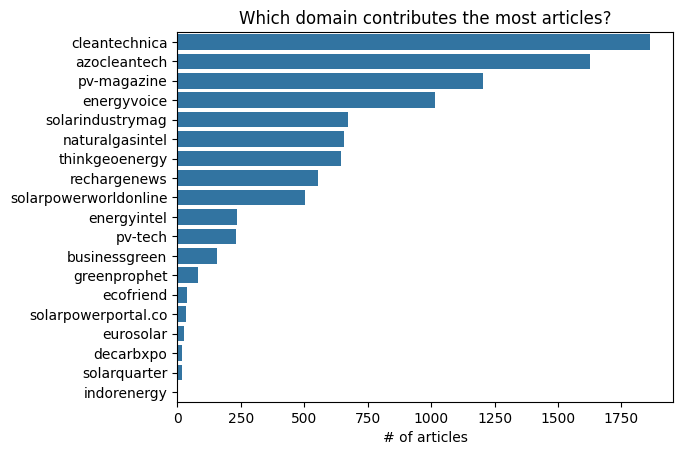

In [11]:
sns.countplot(
    df_cleantech_media, 
    y="domain", 
    order=df_cleantech_media['domain'].value_counts().index)

plt.title("Which domain contributes the most articles?")
plt.xlabel("# of articles")
plt.ylabel("")
plt.show()

Before when checking for the trailing characters I saw some "all rights reserved". So I wanted to know which fraction of articles is meant to be "protected" by their writers.

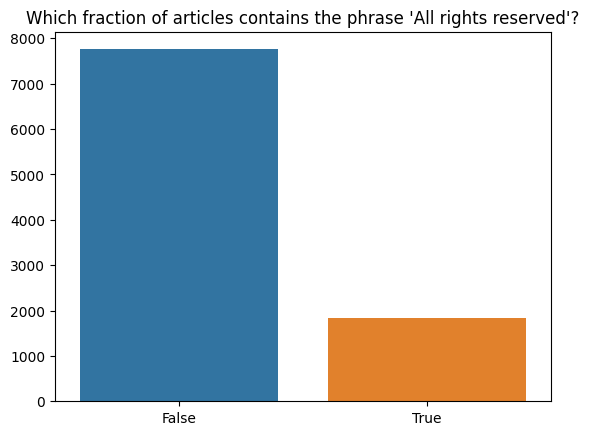

In [12]:
df_plot = df_cleantech_media[['content']].copy()
df_plot['contains_rights_reserved'] = df_plot.content.str.lower().str.contains('all rights reserved')
sns.countplot(
    df_plot, 
    x="contains_rights_reserved", 
    hue="contains_rights_reserved",
    legend=False
)

plt.xlabel("")
plt.ylabel("")
plt.title("Which fraction of articles contains the phrase 'All rights reserved'?");

The question remains: should these be in a public dataset? Should we use these for research?

# Text preprocessing

In [13]:
# ...